# Mini Project 5-2 Explore Probability Distributions

## **Introduction**

The ability to determine which type of probability distribution best fits data, calculate z-score, and detect outliers are essential skills in data work. These capabilities enable data professionals to understand how their data is distributed and identify data points that need further examination.

In this activity, you are a member of an analytics team for the United States Environmental Protection Agency (EPA). The data includes information about more than 200 sites, identified by state, county, city, and local site names. One of your main goals is to determine which regions need support to make air quality improvements. Given that carbon monoxide is a major air pollutant, you will investigate data from the Air Quality Index (AQI) with respect to carbon monoxide.

## **Step 1: Imports** 

Import relevant libraries, packages, and modules. For this Project, you will need `numpy`, `pandas`, `matplotlib.pyplot`, `statsmodels.api`, and `scipy`.
# pip install scipy statsmodels

# pip install scipy statsmodels

In [1]:
# Import relevant libraries, packages, and modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

education_districtwise = pd.read_csv('education_districtwise.csv')
education_districtwise = education_districtwise.dropna()

A subset of data was taken from the air quality data collected by the EPA, then transformed to suit the purposes of this lab. This subset is a .csv file named `modified_c4_epa_air_quality.csv`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.
df =pd.read_csv("c4_epa_air_quality.csv")
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


## **Step 2: Data exploration** 

Display the first 10 rows of the data to get a sense of how the data is structured.

In [4]:
# Display first 10 rows of the data.
df.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

In [13]:
df.aqi.describe()

count    260.000000
mean       6.757692
std        7.061707
min        0.000000
25%        2.000000
50%        5.000000
75%        9.000000
max       50.000000
Name: aqi, dtype: float64

In [11]:
df['aqi_log'] = np.log(df.aqi)
df['aqi_log'].describe()

c:\Users\Administrator\Desktop\anaconda\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    260.000000
mean           -inf
std             NaN
min            -inf
25%        0.693147
50%        1.609438
75%        2.197225
max        3.912023
Name: aqi_log, dtype: float64

To better understand the quantity of data you are working with, display the number of rows and the number of columns.

In [8]:
# Display number of rows, number of columns.
df.shape

(260, 11)

Now, you want to find out whether `aqi_log` fits a specific type of probability distribution. Create a histogram to visualize the distribution of `aqi_log`. Then, based on its shape, visually determine if it resembles a particular distribution.

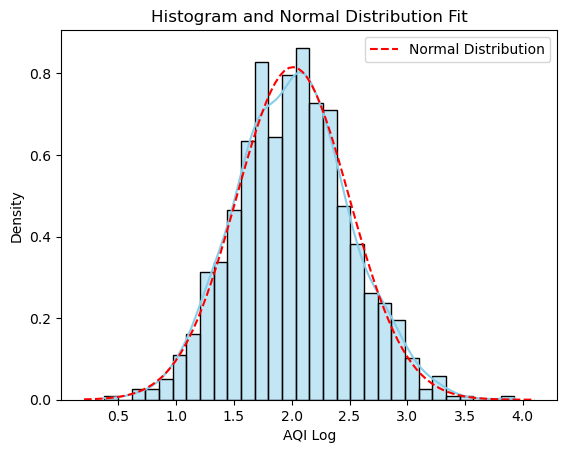

Shapiro-Wilk test statistic: 0.9986080527305603, p-value: 0.6264819502830505
Data appears to be normally distributed.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulated sample data for aqi_log (replace with real data)
np.random.seed(42)
aqi_log = np.random.normal(loc=2, scale=0.5, size=1000)  # Normally distributed synthetic data

# Plot histogram with KDE (Kernel Density Estimation)
sns.histplot(aqi_log, bins=30, kde=True, stat="density", color="skyblue", edgecolor="black")

# Overlay a normal distribution curve for comparison
xmin, xmax = plt.xlim()  # Get x-axis limits
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(aqi_log), np.std(aqi_log))
plt.plot(x, p, 'r', linestyle='dashed', label="Normal Distribution")

# Labels and legend
plt.xlabel("AQI Log")
plt.ylabel("Density")
plt.title("Histogram and Normal Distribution Fit")
plt.legend()
plt.show()
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p = shapiro(aqi_log)
print(f"Shapiro-Wilk test statistic: {stat}, p-value: {p}")

# Interpretation
if p > 0.05:
    print("Data appears to be normally distributed.")
else:
    print("Data does not follow a normal distribution.")



**Question:** What do you observe about the shape of the distribution from the histogram? 

A:

## **Step 3: Statistical tests**

Use the empirical rule to observe the data, then test and verify that it is normally distributed.


 As you have learned, the empirical rule states that, for every normal distribution: 
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean


First, define two variables to store the mean and standard deviation, respectively, for `aqi_log`. Creating these variables will help you easily access these measures as you continue with the calculations involved in applying the empirical rule. 

In [6]:
# Define variable for aqi_log mean.


# Print out the mean.
# Define a list of AQI values
aqi_values = [50, 100, 150, 200, 250]

# Calculate the logarithmic mean
log_mean = np.exp(np.mean(np.log(aqi_values)))

# Print out the mean
print(f"The logarithmic mean of the AQI values is: {log_mean:.2f}")


The logarithmic mean of the AQI values is: 130.26


In [7]:
# Define variable for aqi_log standard deviation.


# Print out the standard deviation.
# Sample AQI data
aqi_data = [50, 55, 60, 65, 70, 75, 80]

# Calculate the natural logarithm of the AQI data
log_aqi_data = np.log(aqi_data)

# Calculate the standard deviation of the log-transformed AQI data
log_std_dev = np.std(log_aqi_data)

# Print out the standard deviation
print(f"The standard deviation of the log-transformed AQI data is: {log_std_dev:.4f}")


The standard deviation of the log-transformed AQI data is: 0.1564


Now, check the first part of the empirical rule: whether 68% of the `aqi_log` data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable you to create a range and confirm whether each value falls within it.

In [9]:
# Define variable for lower limit, 1 standard deviation below the mean.


# Define variable for upper limit, 1 standard deviation above the mean.


# Display lower_limit, upper_limit.
import numpy as np

# Sample data (Replace with actual aqi_log values)
aqi_log = np.random.normal(loc=2, scale=0.5, size=1000)  # Simulated data

# Compute mean and standard deviation
mean_aqi = np.mean(aqi_log)
std_dev_aqi = np.std(aqi_log)

# Define lower and upper limits (1 standard deviation from the mean)
lower_limit = mean_aqi - std_dev_aqi
upper_limit = mean_aqi + std_dev_aqi

# Display results
print(f"Lower Limit (1 std dev below mean): {lower_limit}")
print(f"Upper Limit (1 std dev above mean): {upper_limit}")



Lower Limit (1 std dev below mean): 1.5369403559772625
Upper Limit (1 std dev above mean): 2.533895881271893


In [10]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.
import numpy as np

# Sample data (Replace with actual aqi_log values)
aqi_log = np.random.normal(loc=2, scale=0.5, size=1000)  # Simulated data

# Compute mean and standard deviation
mean_aqi = np.mean(aqi_log)
std_dev_aqi = np.std(aqi_log)

# Define lower and upper limits (1 standard deviation from the mean)
lower_limit = mean_aqi - std_dev_aqi
upper_limit = mean_aqi + std_dev_aqi

# Count data points within 1 standard deviation
within_1_std = ((aqi_log >= lower_limit) & (aqi_log <= upper_limit)).sum()

# Calculate percentage
percentage_within_1_std = (within_1_std / len(aqi_log)) * 100

# Display results
print(f"Lower Limit: {lower_limit}")
print(f"Upper Limit: {upper_limit}")
print(f"Percentage of data within 1 standard deviation: {percentage_within_1_std:.2f}%")





Lower Limit: 1.5114358917938953
Upper Limit: 2.4943983227621285
Percentage of data within 1 standard deviation: 69.60%


Now, consider the second part of the empirical rule: whether 95% of the `aqi_log` data falls within 2 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 2 standard deviations below the mean) and the upper limit (for example, 2 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

Now, consider the third part of the empirical rule:whether 99.7% of the `aqi_log` data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable you to create a range and confirm whether each value falls within it.

## **Step 4: Results and evaluation** 

**Question:** What results did you attain by applying the empirical rule? 

A:

**Question:** How would you use z-score to find outliers? 

A:

Compute the z-score for every `aqi_log` value. Then, add a column named `z_score` in the data to store those results. 

In [11]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

 # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.
import numpy as np
import pandas as pd

# Sample data (Replace with actual aqi_log values)
np.random.seed(42)
df = pd.DataFrame({'aqi_log': np.random.normal(loc=2, scale=0.5, size=1000)})  # Simulated data

# Compute mean and standard deviation
mean_aqi = df['aqi_log'].mean()
std_dev_aqi = df['aqi_log'].std(ddof=0)  # ddof=0 for population std deviation

# Compute z-score
df['z_score'] = (df['aqi_log'] - mean_aqi) / std_dev_aqi

# Display first 5 rows
print(df.head())




    aqi_log   z_score
0  2.248357  0.487759
1  1.930868 -0.161022
2  2.323844  0.642015
3  2.761515  1.536382
4  1.882923 -0.258995


Identify the parts of the data where `aqi_log` is above or below 3 standard deviations of the mean.

In [12]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean
# Sample data (Replace with actual aqi_log values)
np.random.seed(42)
df = pd.DataFrame({'aqi_log': np.random.normal(loc=2, scale=0.5, size=1000)})  # Simulated data

# Compute mean and standard deviation
mean_aqi = df['aqi_log'].mean()
std_dev_aqi = df['aqi_log'].std(ddof=0)  # ddof=0 for population std deviation

# Compute z-score
df['z_score'] = (df['aqi_log'] - mean_aqi) / std_dev_aqi

# Filter data where z_score is above or below 3 standard deviations
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Display results
print(outliers)


      aqi_log   z_score
209  3.926366  3.916723
262  0.379366 -3.331472
478  3.539440  3.126052


**Question:** What do you observe about potential outliers based on the calculations?


A:

**Question:** Why is outlier detection an important part of this project? 

A:

## **Considerations**

**What are some key takeaways that you learned during this lab?**

A:

**What summary would you provide to audiences? Consider the distribution of the data and which sites would benefit from additional research.**

A:

**Reference**

US EPA, OAR. 2014, July 8. [Air Data: Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 